In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'wine-quality' dataset.
Path to dataset files: /kaggle/input/wine-quality
['winequalityN.csv']


In [3]:
df = pd.read_csv(path + '/winequalityN.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

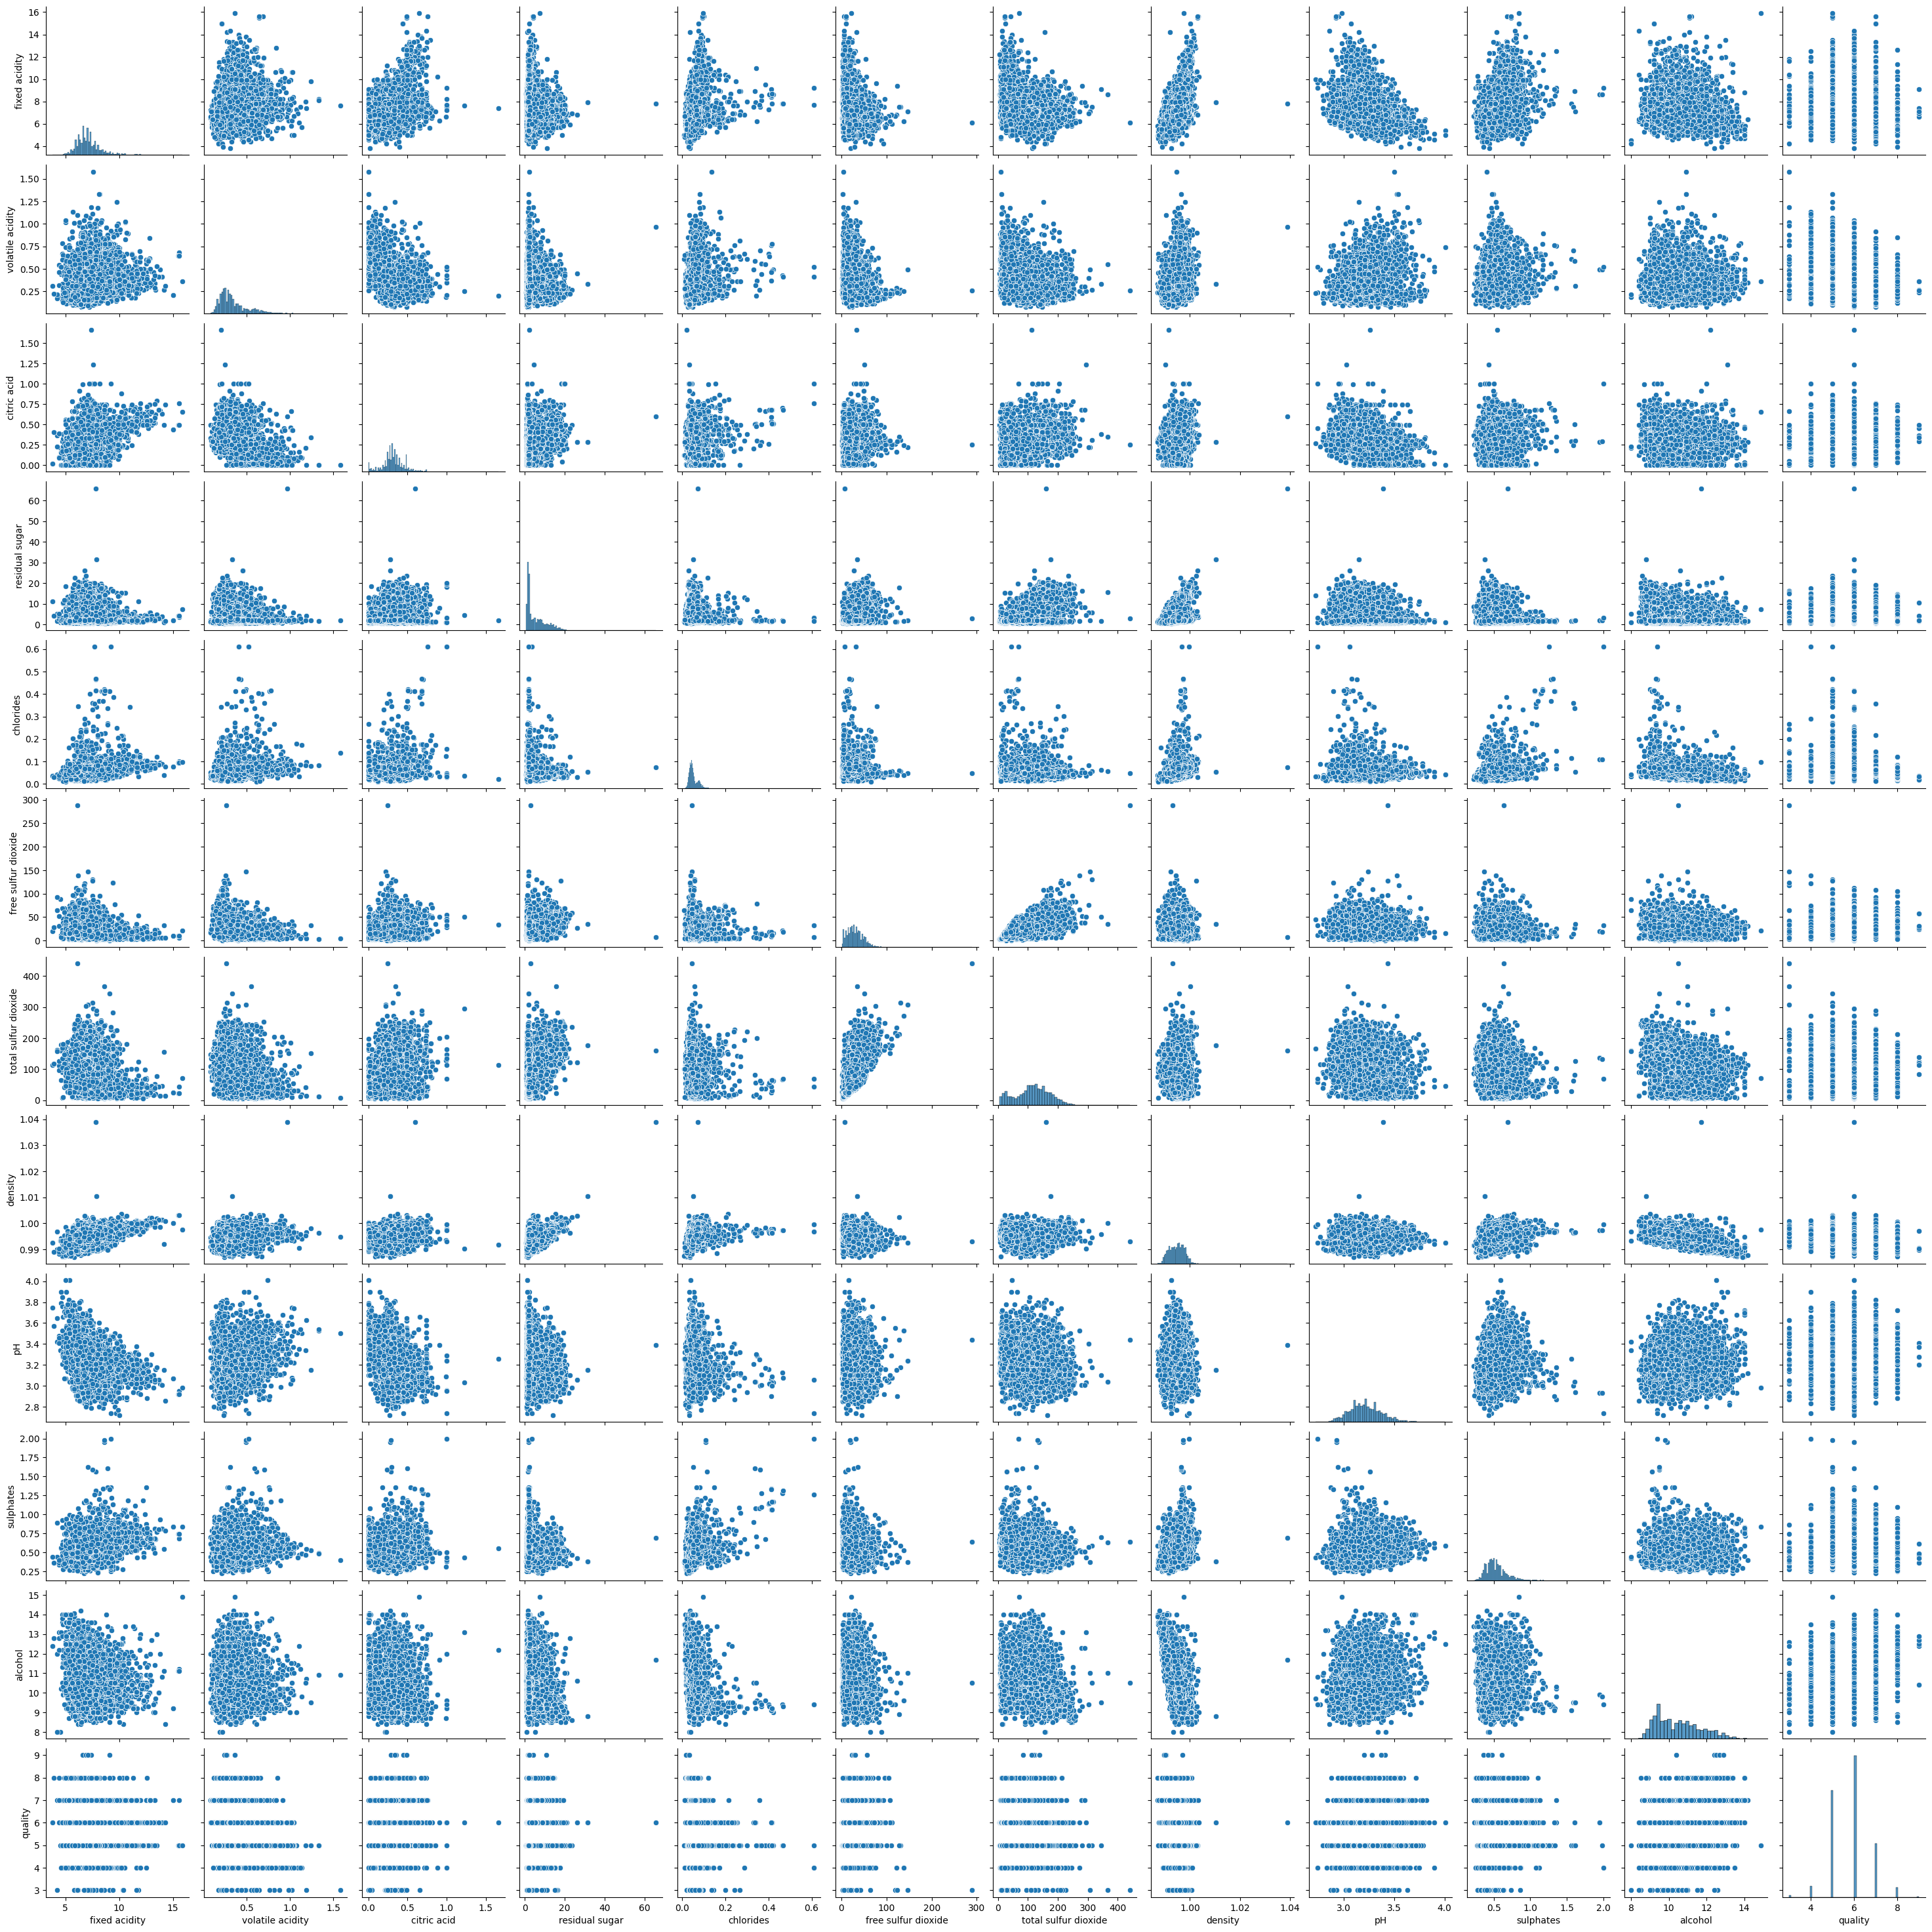

In [6]:
sns.pairplot(df)

## feature engineering

drop null data

In [7]:
df.dropna(subset=['fixed acidity',
                  'volatile acidity',
                  'citric acid',
                  'residual sugar',
                  'chlorides',
                  'pH',
                  'sulphates'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 656.5+ KB


mapping type

In [8]:
df['type'] = df['type'].map({'white': 0, 'red': 1})
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

quality > 6 == good
quality < 6 == nott good

In [9]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        0  
1       0.49      9.5        0  
2       0.44     10.1        0  
3       0.40      9.9        0  
4       0.40      9.9        0

## EDA

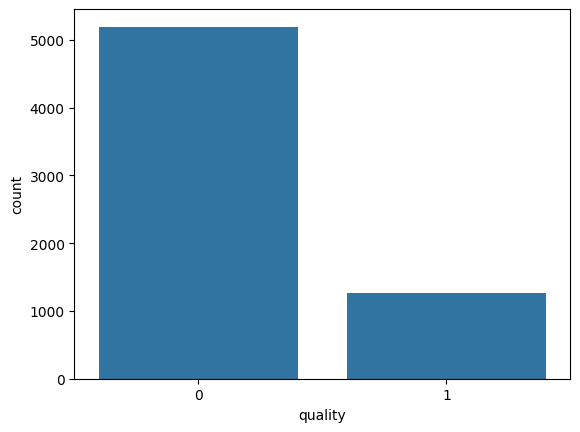

quality
0    0.803342
1    0.196658
Name: proportion, dtype: float64

In [10]:
sns.countplot(x=df['quality'])
plt.show()

df['quality'].value_counts(normalize=True)

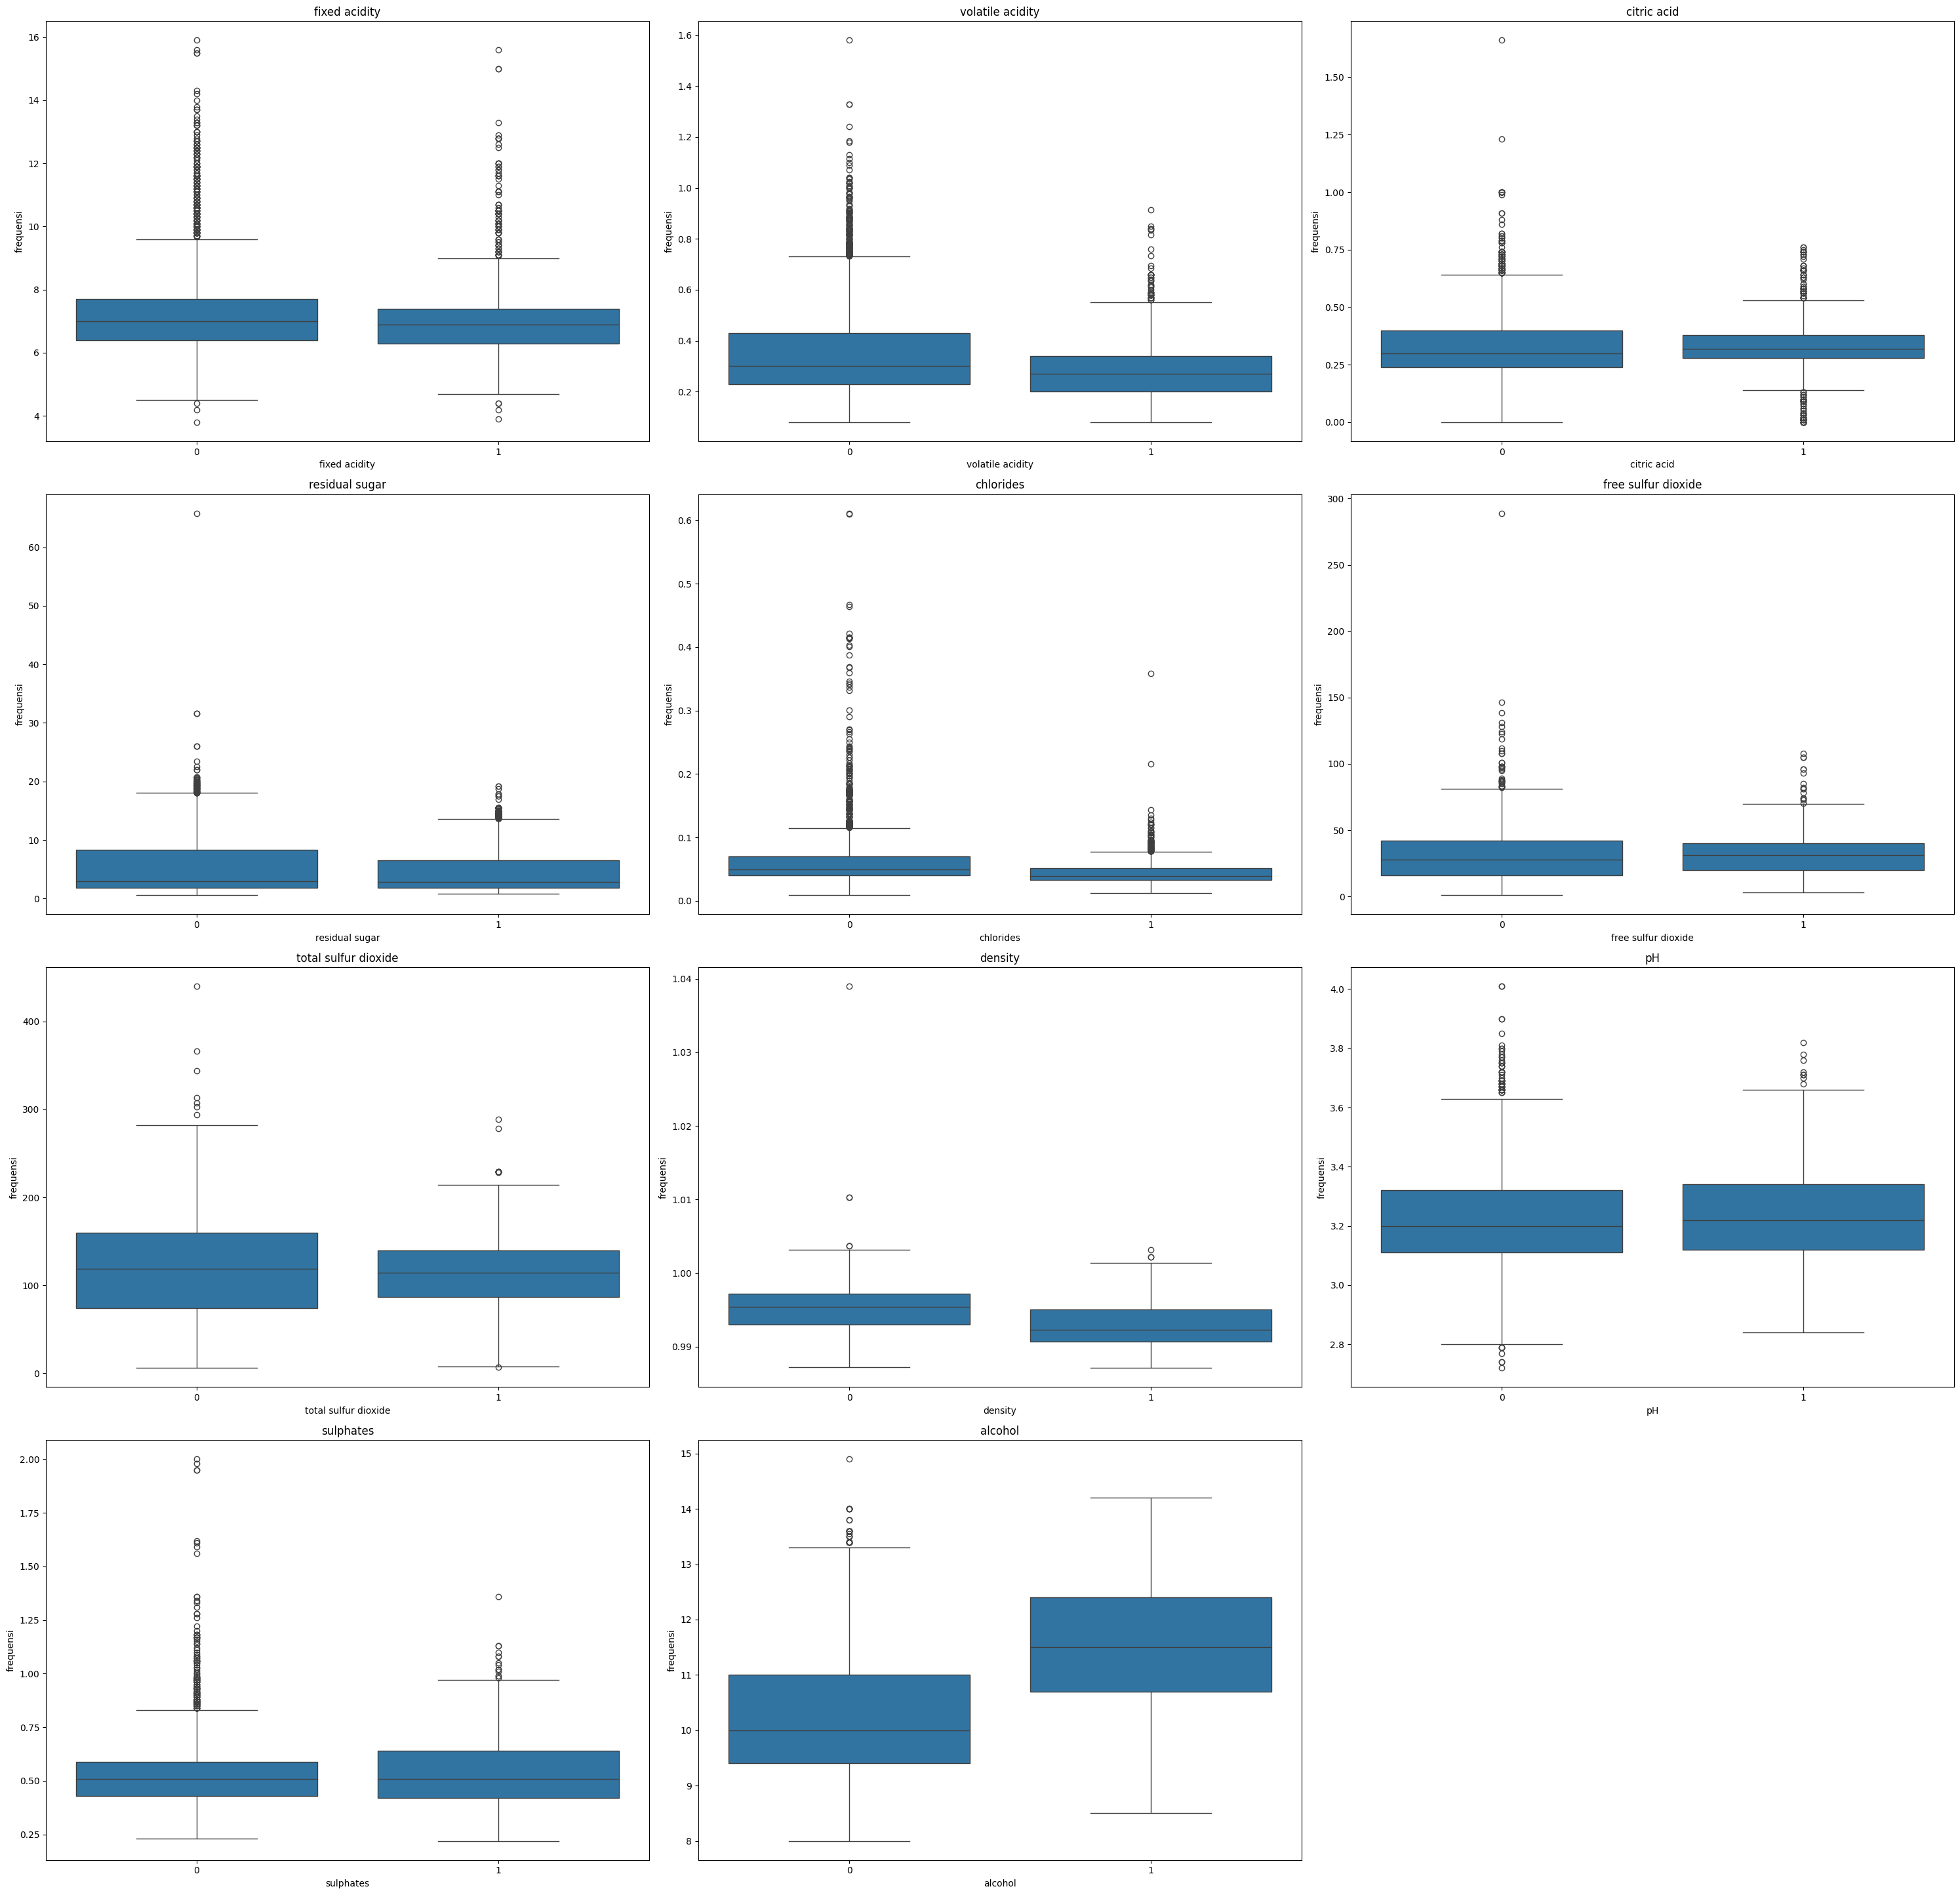

In [11]:
cont_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(30, 29))
for i, col in enumerate(cont_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df['quality'], y=df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('frequensi')
plt.tight_layout()
plt.show()

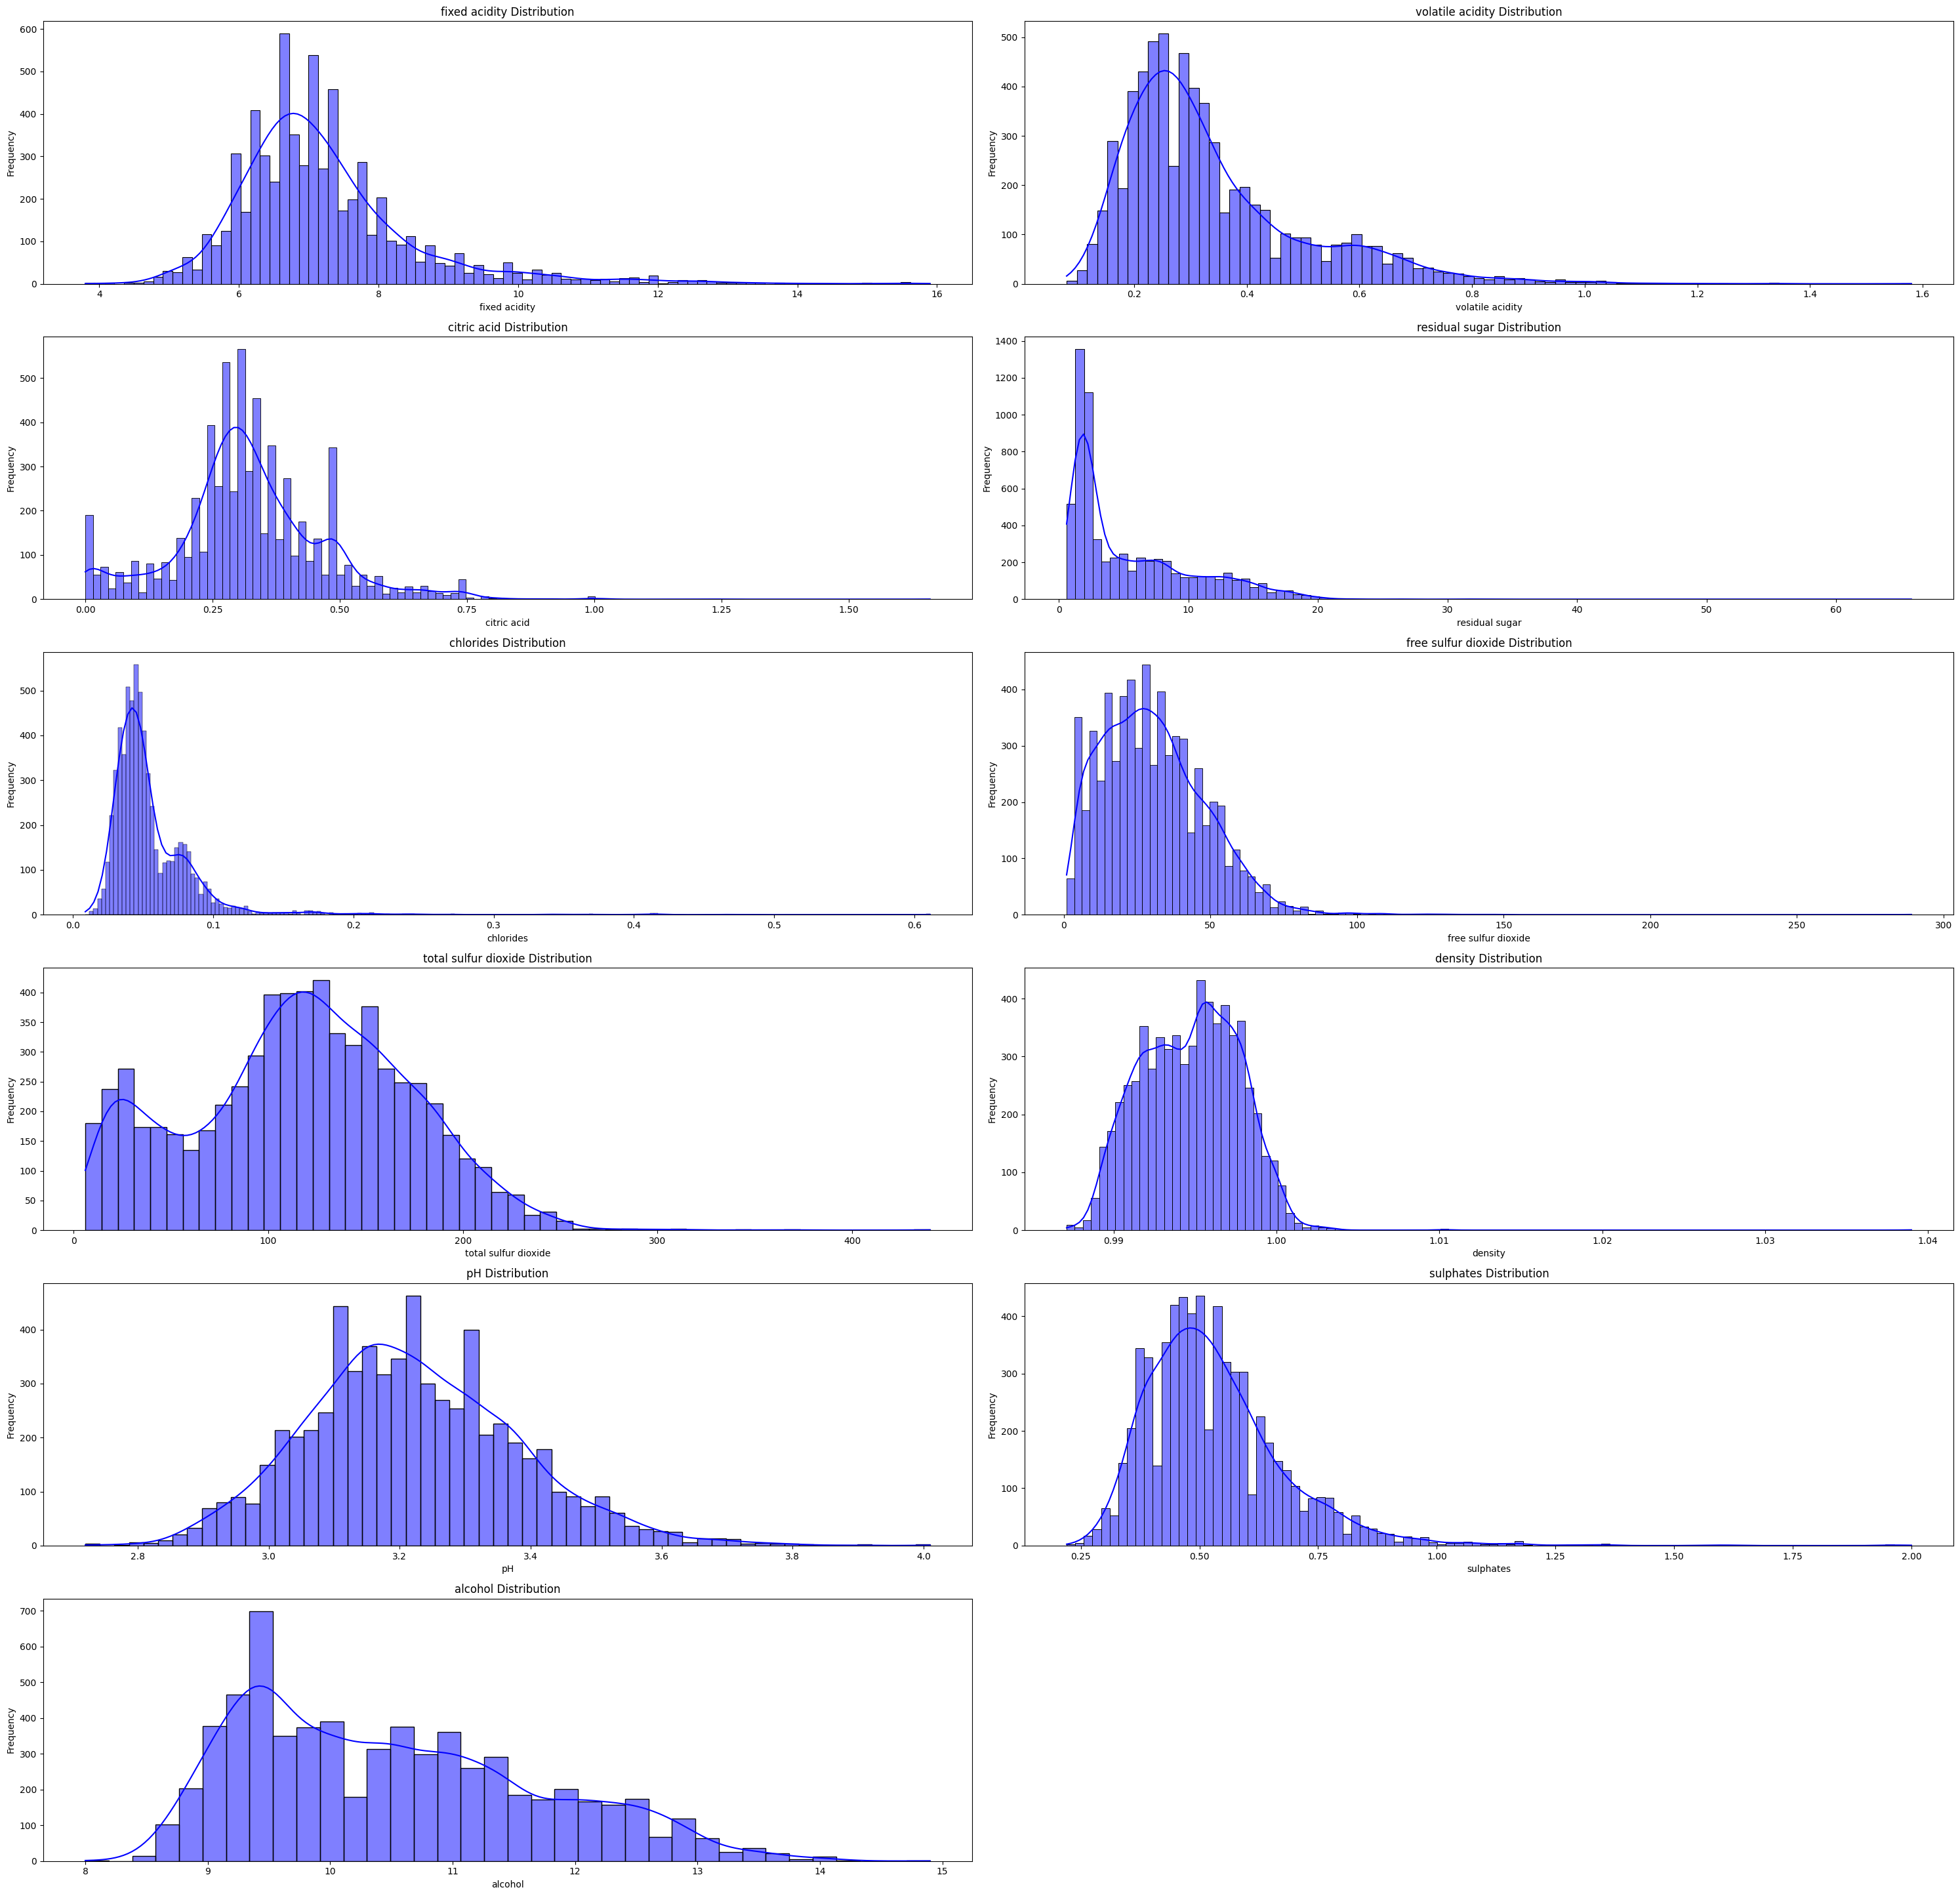

In [12]:
plt.figure(figsize=(30, 29))
for i, col in enumerate(cont_cols):
    plt.subplot(6,2,i+1)
    sns.histplot(df[col],color="b", kde=True)
    plt.title(col + " Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

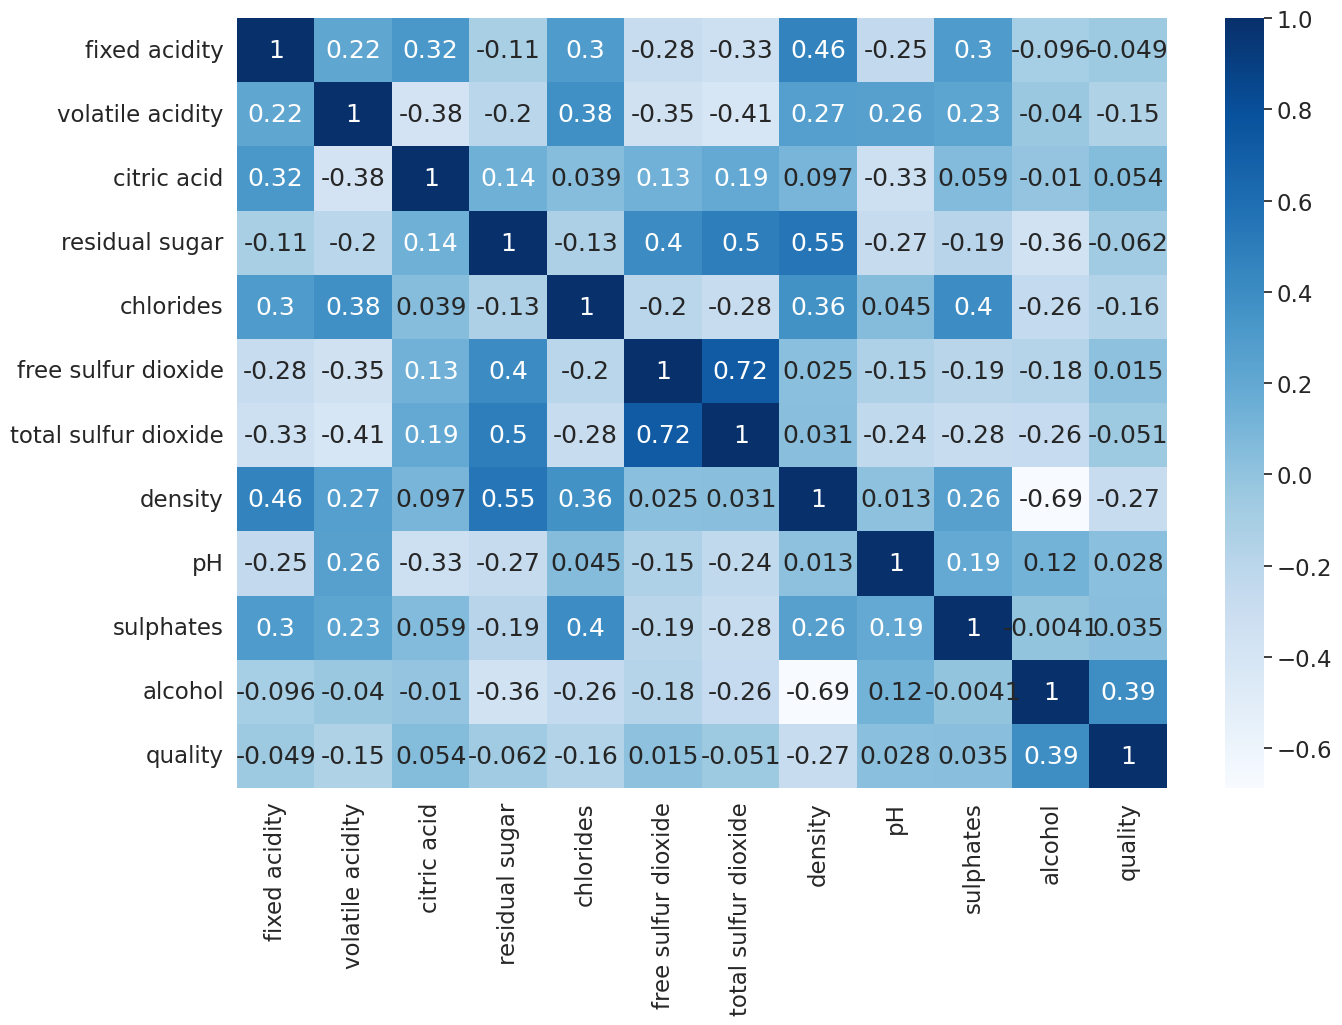

In [13]:
from kagglehub.packages import contextlib
sns.set(style = 'whitegrid', font_scale = 1.5)
plt.figure(figsize=(15,10))
sns.heatmap(df[cont_cols+ ['quality']].corr(),annot=True,cmap="Blues")
plt.show()

## train

In [14]:
X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

pipeline
split tipe kolom
preprocessor

In [15]:
num_features = X.select_dtypes(include=['float64', 'int64']).columns

num_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
      ('num', num_transform, num_features)
])

model

In [35]:
model_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

model_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced',
    ))
])

eval

In [36]:
scoring_metrics =  [
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc',
    'average_precision'
]

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in [('Baseline', model_baseline), ('LogReg', model_logreg)]:
    cv_results = cross_validate(model, X_train, y_train, cv=crossval, scoring=scoring_metrics)

    results[name] = {
        'Mean Accuracy': f"{cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}",
        'Mean Precision': f"{cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}", # BARU
        'Mean Recall': f"{cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}",       # BARU
        'Mean F1': f"{cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}",                   # BARU
        'Mean ROC-AUC': f"{cv_results['test_roc_auc'].mean():.4f} ± {cv_results['test_roc_auc'].std():.4f}",
        'Mean PR-AUC': f"{cv_results['test_average_precision'].mean():.4f} ± {cv_results['test_average_precision'].std():.4f}"
    }

In [37]:
results_df = pd.DataFrame(results).T
print("\nbaseline v model (5-Fold CV)")
print(results_df)

model_logreg.fit(X_train, y_train)
y_pred_proba = model_logreg.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nFinal Test ROC-AUC (LogReg): {test_auc:.4f}")


baseline v model (5-Fold CV)
            Mean Accuracy   Mean Precision      Mean Recall          Mean F1  \
Baseline  0.8033 ± 0.0005  0.0000 ± 0.0000  0.0000 ± 0.0000  0.0000 ± 0.0000   
LogReg    0.7213 ± 0.0118  0.3927 ± 0.0129  0.7611 ± 0.0284  0.5179 ± 0.0152   

             Mean ROC-AUC      Mean PR-AUC  
Baseline  0.5000 ± 0.0000  0.1967 ± 0.0005  
LogReg    0.8092 ± 0.0143  0.4919 ± 0.0255  

Final Test ROC-AUC (LogReg): 0.8104


In [38]:
cr = classification_report(y_test, model_logreg.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1039
           1       0.40      0.76      0.52       254

    accuracy                           0.73      1293
   macro avg       0.66      0.74      0.67      1293
weighted avg       0.82      0.73      0.75      1293



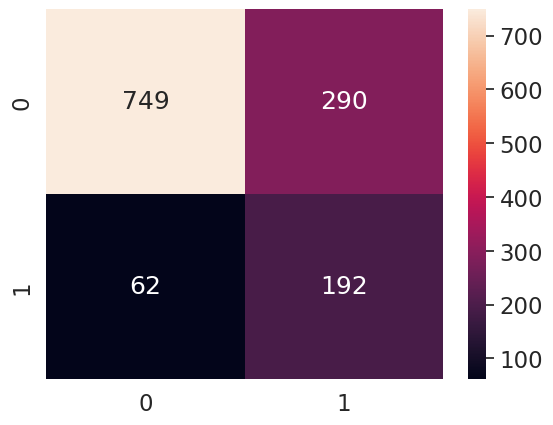

In [39]:
cm = confusion_matrix(y_test, model_logreg.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

threshold

In [43]:
y_scores = model_logreg.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"F1 score: {f1_scores[np.abs(thresholds - 0.5).argmin()]:.4f}")
print(f"best threshold: {best_threshold:.4f}")
print(f"F1 score optimal: {best_f1:.4f}")

F1 score: 0.5217
best threshold: 0.6073
F1 score optimal: 0.5338


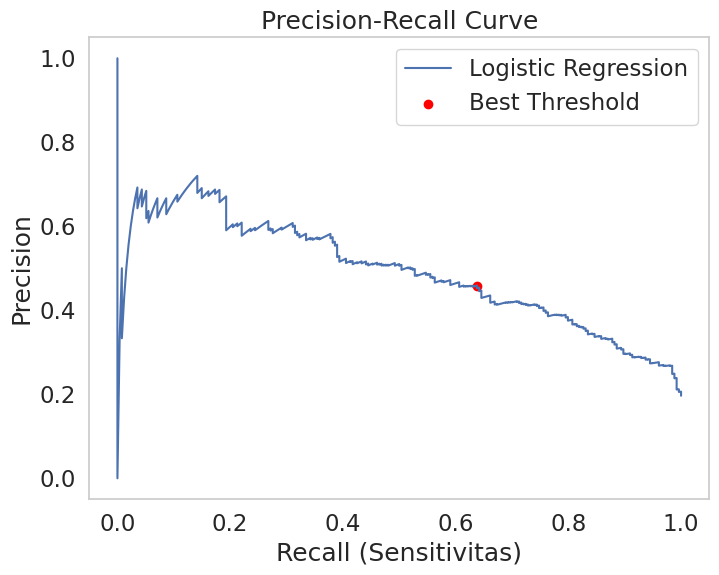

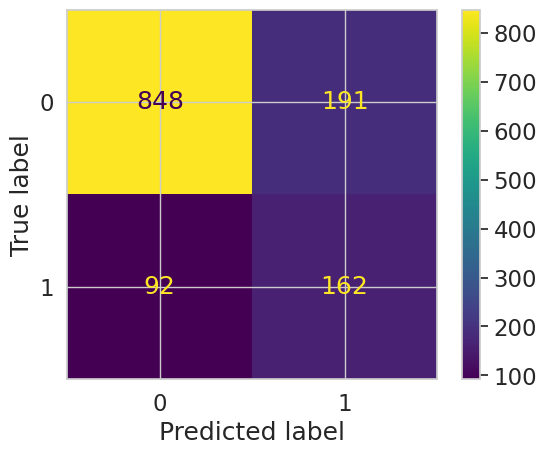

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1039
           1       0.46      0.64      0.53       254

    accuracy                           0.78      1293
   macro avg       0.68      0.73      0.70      1293
weighted avg       0.82      0.78      0.79      1293



In [41]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Logistic Regression')
plt.scatter(recalls[best_idx], precisions[best_idx], marker='o', color='red', label='Best Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall (Sensitivitas)')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

y_pred_new = (y_scores >= best_threshold).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)
plt.show()

print(classification_report(y_test, y_pred_new))